# Omics papers comparisons

**COSC 545 Fall 2022** <br>
Victor Hazlewood (NetID vhazlewo, GitHubId uxvictor, email victor@utk.edu) <br>
MiniProject Assignment 1 <br>
Group 4: walsh15 jim5 gkirk rsexton8 wparham1 dscott57 vhazlewo 


# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

### Getting the data

The 2019 and 2020 omics software tools survey authored by Biswapriya B Misra are compared and then the 2019 B.B. Misra paper is compared to Michael Olivier's 2019 paper on multiomics. The papers were only available in PDF format, so I used a PDF to text converter, then manually edited the text (to remove page break components and superfulous text) and then put the text online as an HTML file by putting the text between plaintext HTML markup.  The citations and URLs are as follows:

Misra, Biswapriya B., Carl Langefeld, Michael Olivier, and Laura A. Cox. "Integrated omics: tools, advances and future approaches." Journal of molecular endocrinology 62, no. 1 (2019): R21-R45.
https://volweb.utk.edu/~vhazlewo/omics-2019.html

Misra, Biswapriya B. "New software tools, databases, and resources in metabolomics: Updates from 2020." Metabolomics 17, no. 5 (2021): 1-24.
https://volweb.utk.edu/~vhazlewo/omics-2020.html

Olivier, Michael, Reto Asmis, Gregory A. Hawkins, Timothy D. Howard, and Laura A. Cox. "The need for multi-omics biomarker signatures in precision medicine." International journal of molecular sciences 20, no. 19 (2019): 4781.
https://volweb.utk.edu/~vhazlewo/multi-omics-in-medicine.html

In [128]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=\n\r]', "", w)
    wnn = re.sub('\s+', "", wn)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wnn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),35)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        
# populate three lists with text from the three papers
omics2019='https://volweb.utk.edu/~vhazlewo/omics-2019.html'
omics2020='https://volweb.utk.edu/~vhazlewo/omics-2020.html'
multiomics2019='https://volweb.utk.edu/~vhazlewo/multi-omics-in-medicine.html'
(wf_2019, tw_2019) = get_wf(omics2019)
(wf_2020, tw_2020) = get_wf(omics2020)
(mo_2019, tw_mo_2019) = get_wf(multiomics2019)
print('Total words in Integrated omics 2019:', tw_2019)
print('Total words in New Tools in Metaboloics:', tw_2020)
print('Total words in Need for multi-omics is precision medicine:', tw_mo_2019)
ml = min(len(wf_2019),35)
print("Values of the sorted lists")
for i in range(0,ml,1):
    print("%12s %3s  %12s %3s %12s %3s" % (wf_2019[i][0], str(wf_2019[i][1]), wf_2020[i][0], str(wf_2020[i][1]), mo_2019[i][0], str(mo_2019[i][1])) )
#    print (wf_2019[i][0] + "\t" + str(wf_2019[i][1]) + "\t\t" + wf_2020[i][0] + "\t" + str(wf_2020[i][1]) + "\t\t" + mo_2019[i][0] + "\t" + str(mo_2019[i][1]))  

Total words in Integrated omics 2019: 6996
Total words in New Tools in Metaboloics: 6208
Total words in Need for multi-omics is precision medicine: 2950
Values of the sorted lists
         (eg  19           ion  15    molecular  12
   molecules  20      spectral  16        often  13
  individual  20      analyses  16      genetic  13
transcriptomics  20     molecular  16     research  13
      number  22            ms  16     oncology  13
     include  22          msms  16      complex  13
     studies  23     resources  17    mutations  14
    approach  23   statistical  18        types  14
       types  23        allows  18  information  14
     samples  23    untargeted  18   individual  14
   variation  24     r-package  20     identify  14
    multiple  26  visualization  20         used  15
   different  28       methods  20      changes  15
     methods  30      features  21     clinical  16
        used  30      datasets  21         risk  16
    genomics  30          peak  23  

Word Frequency Comparison between:


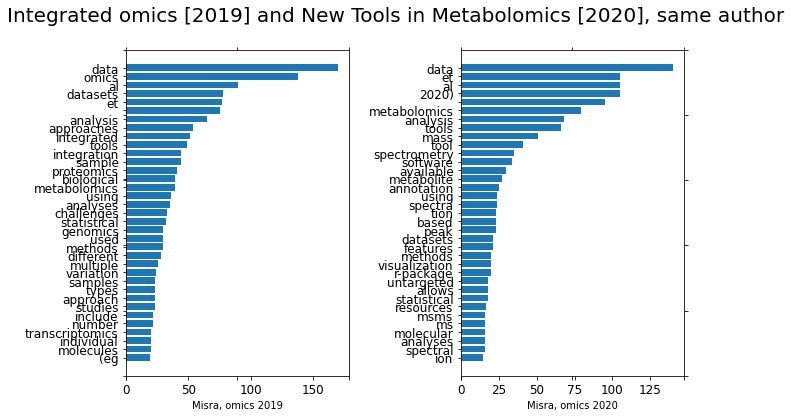

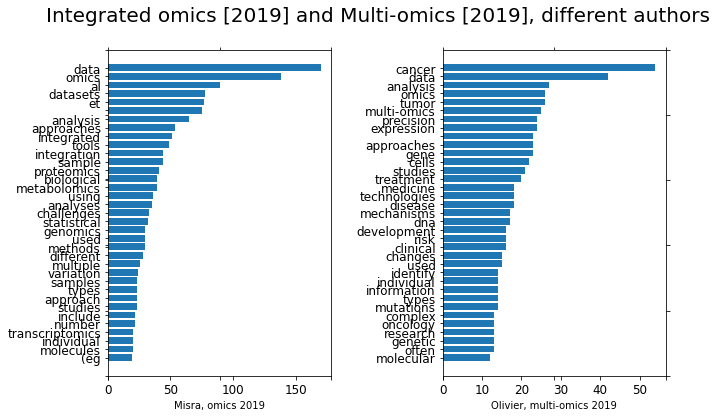

In [131]:
#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title, label1, label2):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=12)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')
    ax1.set(xlabel=label1)

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=12)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')
    ax2.set(xlabel=label2)

print("Word Frequency Comparison between:")
plotTwoLists (wf_2019, wf_2020, 'Integrated omics [2019] and New Tools in Metabolomics [2020], same author', 'Misra, omics 2019', 'Misra, omics 2020')
plotTwoLists (wf_2019, mo_2019, 'Integrated omics [2019] and Multi-omics [2019], different authors', 'Misra, omics 2019', 'Olivier, multi-omics 2019')

# Assignment 1

1. Compare word frequencies between two works of a single author.<br>
   The above shows the word frequency comparison between B.B. Misra omics papers from 2019 and 2020.
1. Compare word frequencies between works of two authors.<br>
   The above shows the word frequency comparison between B.B. Misra omics papers from 2019 and M. Olivier multi-omics paper 2019.
1. Are there some words preferred by one author but used less frequently by another author?<br>
   Of the 35 most frequently used words from each paper by the different authors, in the B.B Misra 2019 paper
   the words integrated, sample, proteomics, metabolomics, genomics, and transcriptomics are used frequently by the author
   and not in the the M. Olivier 2019 paper.  In the M. Olivier 2019 paper the words cancer, tumor, multi-omics, precision,
   expression, gene, disease, and oncology are used somewhat frequently by the author and are not in the B.B. Misra 2019 paper. 

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 
